# Table of contents

1 Introduction
2 Preparation
3 Glimpse of Data
4 Most Popular Sector
5 Most Popular Activity for taking loans
6 Most Popular Use of loans
7 Distribution of the Funded Loan amount
7.1 Distribution of the Funded Loan amount by Country
7.2 Summary of Funded Amount
7.3 Distribution of the Funded Loan amount by Sector
7.4 Distribution of loans by Gender
8 Most common Term In Months in loans
9 Most Popular Countries for loans
10 Maps of Loans
11 Themes Loan combined
12 Most Popular Theme
13 Africa
13.1 Distribution of loans in Africa
13.2 African Conflicts Data
13.2.1 Battle affected Countries
13.2.2 Loans in Battle affected Countries
13.3 Use of loans in Africa
13.4 Most Popular Sector in Africa
13.5 Distribution of the Funded Loan amount in Africa
13.6 Summary of Funded Amount in Africa
14 Asia
14.1 Distribution of loans in Asia
14.2 Poorest Asian Countries from Multidimensional Poverty Measures
14.3 Explore the loans in the Poorest Asian countries
14.4 Use of loans in Asia
14.5 Most Popular Sector in Asia
14.6 Distribution of the Funded Loan amount in Asia
14.7 Summary of Funded Amount in Asia
15 Americas
15.1 Distribution of loans in Americas
15.2 Poorest South American Countries from Multidimensional Poverty Measures
15.3 Explore the loans in the Poorest South American countries
15.4 Use of loans in Americas
15.5 Most Popular Sector in America
15.6 Distribution of the Funded Loan amount in America
15.7 Summary of Funded Amount in America
16 Philippines
17 Kenya
18 El Salvador
19 India

25 Kenya Demographic and Health Survey analysis
25.1 Asset Indicator distribution
25.2 Asset Indicator and MPI
25.3 Distribution Asset Inidcator
25.4 Travel Times and MPI
25.5 NightLights Distribution
25.6 Number of DHS Clusters
25.7 Modelling
25.7.1 Prediction variable
25.7.2 Columns for modelling
25.7.3 XGBoost
25.7.4 The Model Details

# Pre-Overview of Data

## Importing libraries

In [2]:
# importing library
import pandas as pd
import numpy as np
import pandas_profiling
import missingno as msno

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import os
from subprocess import check_output
import scipy


## Importing data

In [3]:
print(check_output(['ls', '../Kiva_founding']).decode('utf8'))

kiva_loans.csv
kiva_mpi_region_locations.csv
kiva_note_1.ipynb
loan_theme_ids.csv
loan_themes_by_region.csv



In [4]:
# main data
kiva_loans = pd.read_csv('kiva_loans.csv')

# data of MPI
kiva_index = pd.read_csv('kiva_mpi_region_locations.csv')

# data of partners
kiva_partners = pd.read_csv('loan_themes_by_region.csv')

# Data Summary

## Kiva Loans


Questions:
- Most Popular Sector
- Most Popular Activity for taking loans
- Most Popular Use of loans
- Distribution of the Funded Loan amount
- Distribution of the Funded Loan amount by Country
- Summary of Funded Amount
- Distribution of the Funded Loan amount by Sector
- Distribution of loans by Gender
- Most common Term In Months in loans
- Most Popular Countries for loans
- Maps of Loans
- Themes Loan combined
- Most Popular Theme

Hypothesis:

In [ ]:
kiva_loans.sample(1)

In [ ]:
kiva_loans.info()

In [ ]:
kiva_loans.dtypes.unique().tolist()

In [ ]:
pandas_profiling.ProfileReport(kiva_loans.iloc[:, 1:7])

In [ ]:
# missing files
msno.matrix(kiva_loans)

In [ ]:
data_missing = round(kiva_loans.isnull().sum()/len(kiva_loans), 3)
missing_perc = pd.DataFrame({'feature':data_missing.index, 'perc_nan':data_missing.values})

In [ ]:
# multiplying by 100
missing_perc.iloc[:, 1] = missing_perc.iloc[:, 1].apply(lambda x: round(x*100, 2))

In [ ]:
# filtering by missing percentage more than 2%
missing_perc[missing_perc['perc_nan']>=2].sort_values('perc_nan', ascending=False)

## Borrower Gender

In [278]:
kiva_loans[['borrower_genders']] = [elem if elem in ['female','male'] else 'group' for elem in kiva_loans['borrower_genders'] ]

In [279]:
kiva_loans['borrower_genders']=[elem if elem in ['female','male'] else 'group' for elem in kiva_loans['borrower_genders'] ]
#to replace values such as "woman, woman, woman, man"

borrowers = kiva_loans['borrower_genders'].value_counts()
labels = (np.array(borrowers.index))
values = (np.array((borrowers / borrowers.sum())*100))

trace = go.Pie(labels=labels, values=values,
              hoverinfo='label+percent',
               textfont=dict(size=20),
                showlegend=True)

layout = go.Layout(
    title="Borrowers' genders"
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Borrowers_genders")

NameError: name 'go' is not defined

In [ ]:
# Aggregating by sector
sector = kiva_loans.groupby('sector').sum()

### Plotting loan by sector

In [ ]:
# sector[['loan_amount']].T
sector

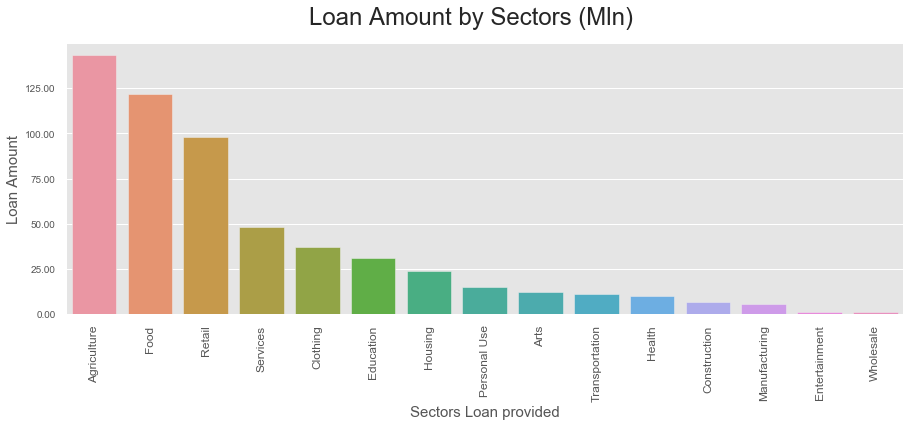

In [280]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(15, 5))
# sorting sector loans
sector.sort_values('loan_amount', ascending=False, inplace=True)


sns.barplot(x=sector.index, y=sector.loan_amount.values, log=False)
plt.xticks(rotation=90, fontsize=12)
fig.suptitle("Loan Amount by Sectors (Mln)", fontsize = 24)
ax.set_xlabel('Sectors Loan provided', fontsize=15)
ax.set_ylabel('Loan Amount', fontsize=15)

x = sector.loan_amount.values
y = sector.loan_amount.values

# change range of number on y-axis
ax.yaxis.set_ticks(np.arange(0, 150000000, 25000000))
# formatting numbers on yaxis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, y: '%3.2f' % (x * 1e-6)))

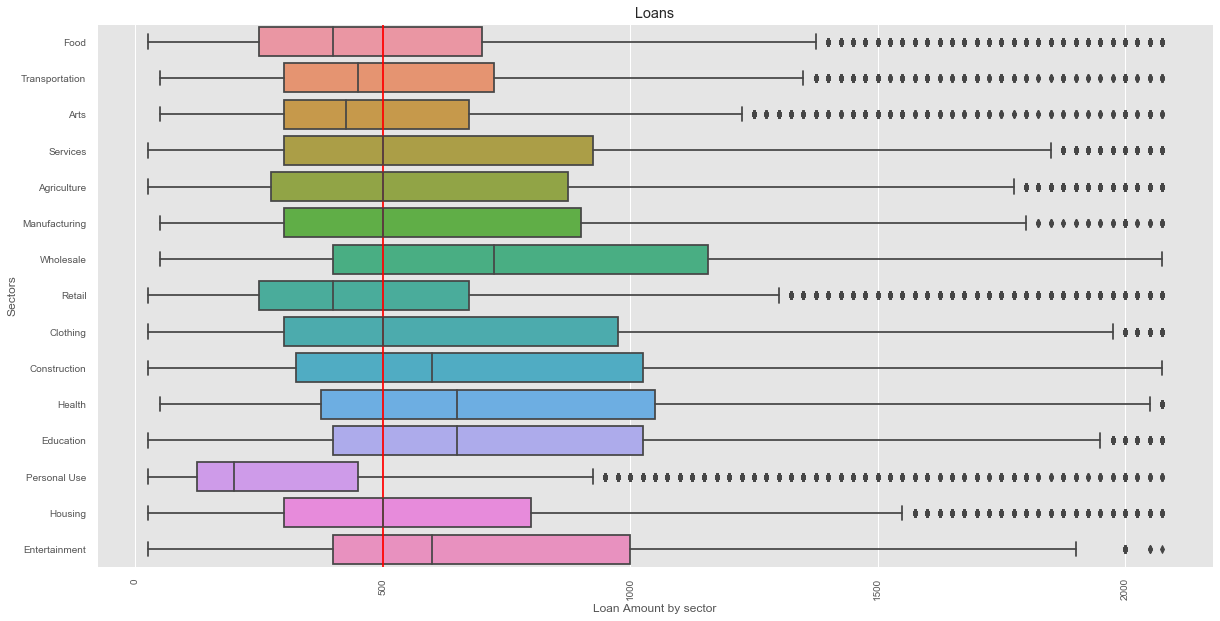

In [303]:
# Interquartiles for removing outliers
Q3 = np.quantile(kiva_loans['loan_amount'], 0.75)
Q1 = np.quantile(kiva_loans['loan_amount'], 0.25)
IQR = Q3 - Q1
Upper_bound = Q3 + 1.5 * IQR
Lower_bound = Q1 - 1.5 * IQR

fig, ax = plt.subplots(figsize=(20, 10))
box_plot = kiva_loans[(kiva_loans['loan_amount'] >= Lower_bound) & (kiva_loans['loan_amount'] <= Upper_bound)]
ax = sns.boxplot(y='sector', x='loan_amount', data=box_plot)
plt.xticks(rotation=90)
ax.set_xlabel('Loan Amount by sector')
ax.set_title('Loans')
ax.set_ylabel('Sectors')
ax.axvline(np.quantile(kiva_loans['loan_amount'], 0.5), color='r')
plt.show()

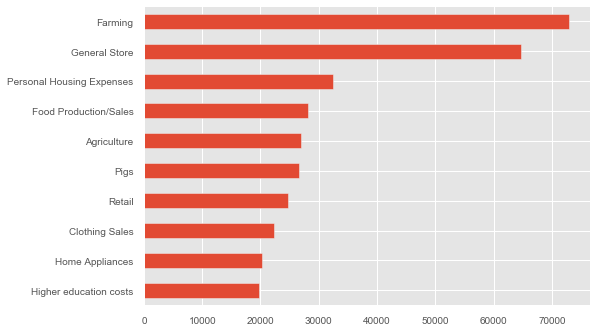

In [295]:
# Popular Activity
activity = kiva_loans.activity.value_counts().nlargest(10).sort_values()
activity.plot(kind='barh')

In [ ]:
#Distribution of Loan Activity type

plt.figure(figsize=(15,8))
count = kiva_loans['activity'].value_counts().head(30)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Activity name?', fontsize=12)
plt.title("Top Loan Activity type", fontsize=16)

In [11]:
kiva_loans_usage.use.value_counts()
# print(kiva_loans_usage.iloc[:, 1].value_counts())

to buy a water filter to provide safe drinking water for their family.                       5217
to buy a water filter to provide safe drinking water for her family.                         4082
To buy a water filter to provide safe drinking water for their family.                       2141
to build a sanitary toilet for her family.                                                   1708
to build a sanitary toilet for her family                                                    1599
                                                                                             ... 
to add capital to her mobile money business.                                                    1
to buy canvas, vinyl, inks, wood, etc.                                                          1
to purchase school supplies for his children.                                                   1
to buy more inventory such as soap, sugar, rice, tea, oil, etc. to sell to his community.       1
to help 65 villagers

In [1]:
def loan_usage(x):
    if 'water' in x:
        return 'water'
    if 'sanitary' in x:
        return 'sanitary'
    if 'fertilizer' in x:
        return 'fertilizer'
    else:
        return x

In [12]:
kiva_loans_usage['use'][kiva_loans_usage['use'].notnull()].iloc[:10, ]

0              To buy seasonal, fresh fruits to sell. 
1    to repair and maintain the auto rickshaw used ...
2    To repair their old cycle-van and buy another ...
3    to purchase an embroidery machine and a variet...
4                             to purchase one buffalo.
5    purchase leather for my business using ksh 20000.
6    To purchase a dairy cow and start a milk produ...
7           to buy more hair and skin care products.  
8    to purchase leather, plastic soles and heels i...
9    to buy a stall, gram flour, ketchup, and coal ...
Name: use, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texts = kiva_loans_usage['use'][kiva_loans_usage['use'].notnull()]

cv = CountVectorizer()   
cv_fit=cv.fit_transform(texts)    
word_list = cv.get_feature_names();    
count_list = cv_fit.toarray().sum(axis=0)  

In [23]:
lst = dict(zip(word_list,count_list))

In [10]:
# Popular Use
# TOdo cleaning data
kiva_loans_usage = kiva_loans[['use']].copy()

drink_water = ['to buy a water filter to provide safe drinking water for their family.', 'to buy a water filter to provide safe drinking water for her family.', 'To buy a water filter to provide safe drinking water for their family.', 'to buy a water filter to provide safe drinking water for his family.']
sanitary = ['to build a sanitary toilet for her family.', 'to build a sanitary toilet for her family']
farm = ['to buy feed and other supplies to raise her pigs.', 'to buy fertilizers and other farm supplies.']
business = ['to buy ingredients for her food production business', 'to purchase more groceries to sell.']

def usage_loan(x):
    """Return purpose of loan usage"""
    empty = ''
    
    if x in drink_water:
        return 'Water Supply for family'
    elif x in sanitary:
        return 'Sanitary for family'
    elif x in business:
        return 'For Business Purpose'
    elif x in farm:
        return 'For Farm'
    else:
        return empty
    
kiva_loans_usage['use_2'] = kiva_loans_usage['use'].apply(usage_loan)
    

In [314]:
#Cross tab withouth highlighting
pd.crosstab(values=kiva_loans['loan_amount'], 
            columns=kiva_loans['borrower_genders'], 
            index=kiva_loans['sector'], 
            aggfunc='count', 
            margins=True, 
            )

borrower_genders,female,group,male,All
sector,,,,
Agriculture,99605,32565,48132,180302
Arts,8834,2003,1223,12060
Clothing,22795,7287,2660,32742
Construction,2488,669,3111,6268
Education,18024,1194,11795,31013
Entertainment,389,46,395,830
Food,98762,23482,14413,136657
Health,5262,1020,2941,9223
Housing,23024,2354,8353,33731


In [326]:

sns.FacetGrid('sector', 'loan_amount', row='borrower_genders', data=kiva_loans[kiva_loans['loan_amount'] <= 2000])

TypeError: __init__() got multiple values for argument 'row'

In [ ]:
# Borrower Gender
kiva_loans.borrower_genders.isnull()
# todo cleaning data

In [ ]:
# Payment interval
kiva_loans.repayment_interval.value_counts().nlargest(10).plot(kind='bar')

## Loan Distribution by year

In [ ]:
# creating year column
kiva_loans.posted_time = pd.to_datetime(kiva_loans.posted_time)
kiva_loans['year'] = kiva_loans.posted_time.dt.year
year_count = kiva_loans.groupby('year').count()
year_sum = kiva_loans.groupby('year').sum()

In [ ]:
year_sum

In [ ]:
# Plotting barcharts
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# ploting count by year
sns.barplot(x=year_count.index, y='id', data=year_count, ax=ax[0])

# plotting loans sum by year
sns.barplot(x=year_sum.index, y='loan_amount', data=year_sum, ax=ax[1])

# Data by country and continent

In [ ]:
countries_loan = kiva_loans.groupby('country')['loan_amount'].sum().sort_values(ascending=False)

In [ ]:
countries_loan
East_Asia = []
Central_asia= []
North_America = []
South_America = []
Europe = []

In [ ]:
kiva_loans.pivot_table(index='sector', columns='country', values='loan_amount', aggfunc=np.sum)

# Poverty information by country

## Table of contents

In [ ]:
20 Multidimensional Poverty Measures
20.1 MPI Rural
20.2 MPI Urban
20.3 MPI Map
20.4 MPI Countries and Kiva Loans
20.5 Use of loans and MPI
20.6 Sectors of loans and MPI
20.7 Distribution of the Funded Loan amount
20.8 Poorest Regions
21 Human Development Index
21.1 Human Development Index Map
22 Population below Poverty Line
22.1 Population under Poverty Line Map
23 Most Dominant Field Partner
24 Naive Poverty Metric
24.1 Distribution of the Naive Poverty Metric
24.2 Poorest Countries based on Naive Poverty Metric

In [7]:
kiva_index.sort_values(by=['hdi'], ascending=False)

KeyError: 'hdi'

# Partner Information

Farming                      72955
General Store                64729
Personal Housing Expenses    32448
Food Production/Sales        28106
Agriculture                  27023
                             ...  
Film                            13
Personal Care Products           7
Celebrations                     5
Event Planning                   5
Adult Care                       2
Name: activity, Length: 163, dtype: int64